In [1]:
import os
import sys
import pandas as pd
import json
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sn
%matplotlib inline

# Only run this cell once to avoid confusion with directories
sys.path.insert(0, os.path.abspath('../utils/')) #point this to the where util is relatively to your working directory

from util import *

data_dir = get_path_to_data_dir()
plot_dir = get_path_to_plot_dir()

# Importing dataframe that only contains numerical values

In [2]:
movie_details_numeric = pd.read_pickle(data_dir + "pre-processed/movie_encoded_only_numeric.pkl")
movie_details_numeric.head()

,budget,id,revenue,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,...,Yasiin Bey,Yul Vazquez,Zac Efron,Zach Galifianakis,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel
0,105000000,64682,351040419,143.0,7.3,3769,130,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,150000000,9543,335154643,116.0,6.2,2317,139,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,140000000,5174,258022233,91.0,6.1,783,220,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,145000000,1735,401128639,112.0,5.2,1387,183,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,15000000,315011,77000000,120.0,6.5,143,211,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Multivariate regression

The multivariate linear regression function provides a means of doing basic OLS analysis. As well as providing insights on trends, it can serve as an indicator of whether a variable would be useful as a parameter in an ML model.

In [3]:
def multivariate_linear_regression(df, cols_X, col_Y='revenue', test_fraction=0.2, plot=False):
    
    if type(cols_X) == str:
        number_indep_variables = 1
    elif type(cols_X) == list:
        number_indep_variables = len(cols_X)
    else:
        raise ValueError('Input for cols_X must be a string or a list of strings')
    
    Y = df[col_Y].to_numpy().reshape(-1, 1)
    X = df[cols_X].to_numpy().reshape(-1, number_indep_variables)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_fraction)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)
    
    # Report slopes and r-squared values
    print('Slope for linear regression with respect to each variable:', regr.coef_)
    print('Coefficient of determination:', round(r2_score(Y_test, Y_pred), 2))

    if plot and number_indep_variables == 1:
        
        fig = plt.figure(figsize=(15,10))
        plt.title(f'Linear regression analysis between {col_Y} and {cols_X}'.replace("_", " "),
                  fontsize=18)
        plt.scatter(X_train, Y_train,  color='blue', s=10.0)
        plt.plot(X_test, Y_pred, color='black', linewidth=1)
        plt.ylabel(f'{col_Y}'.replace("_", " ").capitalize(), fontsize=16)
        plt.xlabel(f'{cols_X}'.replace("_", " ").capitalize(), fontsize=16)
        plt.yticks(fontsize=16)
        plt.xticks(fontsize=16)
        plt.savefig(plot_dir+"multivariate_linear_regression_plot.png")

    return r2_score(Y_test, Y_pred)

For the following OLS analysis, we use a dataset where all movies with revenue reported as zero (presumably because the actual value is unknown) have been removed. In addition, the movies with budget reported as zero (equally because the actual budget is not known) is replaced with the median value of the budget across the remaining movies.

Slope for linear regression with respect to each variable: [[77642.34195821]]
Coefficient of determination: 0.4


0.4009312301376594

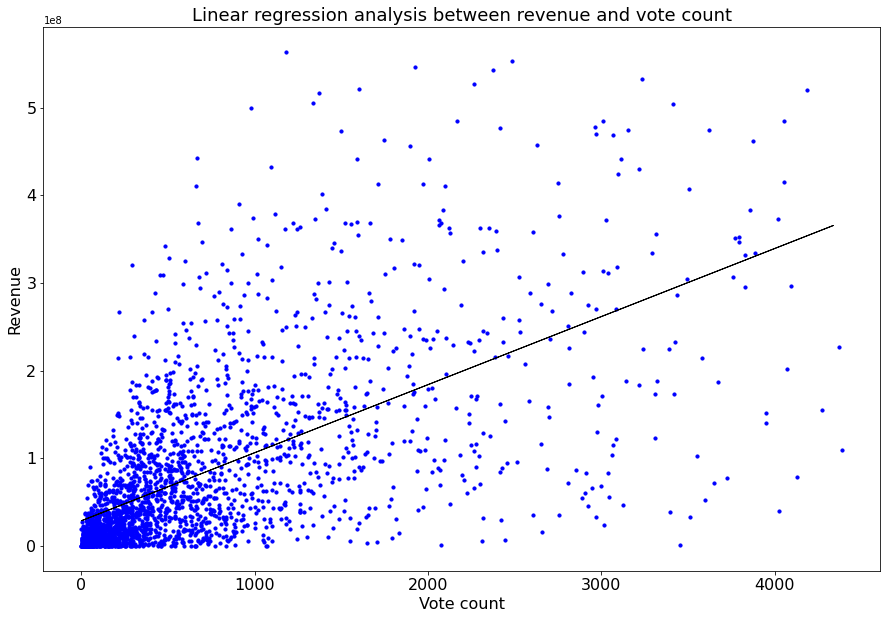

In [4]:
# Demo - single variable linear regression
multivariate_linear_regression(movie_details_numeric, 'vote_count', plot=True)

In [5]:
# Demo - multivariate linear regression
multivariate_linear_regression(movie_details_numeric, ['vote_average', 'budget'], plot=True)

Slope for linear regression with respect to each variable: [[2.13682710e+07 1.97652065e+00]]
Coefficient of determination: 0.42


0.41715581095357035

# Correlations between selected variables

Here, we compute the pairwise correlation between of the floating-point-variables in the dataset. 

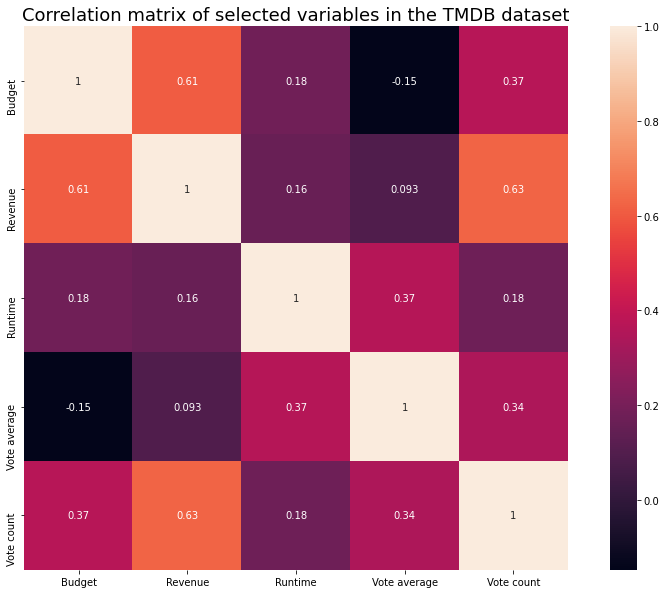

In [6]:
subset = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
df = movie_details_numeric[subset]

corr_matrix = df.corr()

# Change strings for x- and y-ticks
subset_proper = [s.replace("_", " ").capitalize() for s in subset]

plt.figure(figsize=(15,10))
plt.title('Correlation matrix of selected variables in the TMDB dataset', fontsize=18)
sn.heatmap(corr_matrix, xticklabels=subset_proper, yticklabels=subset_proper, annot=True, square=True)
plt.savefig(plot_dir+"correlation_matrix_plot.png")
plt.show()

The budget is moderately correlated with the revenue and the revenue is also moderately correlated with the vote count.